In [1]:
import mujoco
import mediapy as media
import numpy as np

In [2]:
xml = """
<mujoco>
    <option integrator="RK4"/>

    <asset>
        <texture name="grid" type="2d" builtin="checker" rgb1=".1 .2 .3"
         rgb2=".2 .3 .4" width="300" height="300"/>
        <material name="grid" texture="grid" texrepeat="8 8" reflectance=".2"/>
    </asset>

    <worldbody>
        <geom name="floor" pos="0 0 -10" size="10 10 .05" type="plane" material="grid"/>
        <light name="top" pos="0 0 2"/>
        <body name="man">
            <geom name="geom" type="capsule" size="1 1" rgba="0 0 1 1" mass = "1"/>
            <joint type="slide" axis="1 0 0"/>
            <joint type="slide" axis="0 1 0"/>
            <joint type="slide" axis="0 0 1"/>
            <joint type="hinge" axis="0 0 1"/>>
        </body>
    </worldbody>

    <equality>
        <weld name="lock" body1="man" active="false" relpose="1 1 1 0 0 0 1"/>
    </equality>
</mujoco>
"""

model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

""

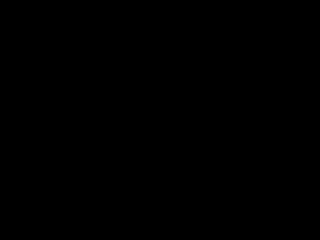

In [19]:
mujoco.mj_resetData(model, data)
mujoco.mj_forward(model, data)
renderer.update_scene(data)

media.show_image(renderer.render())

In [3]:
mujoco.mj_resetData(model, data)  # Reset state and time.

data.body("man").xfrc_applied[0] = 1

duration=20  #s
framerate=60 #Hz
n_frames = int(duration*framerate)

#deltaV = .1
frames=[]
for current_frame in range(n_frames):
    while data.time < current_frame/framerate:
        #t0 = data.time
        mujoco.mj_step(model, data)
        #deltat = data.time-t0

    
        #F = m * deltaV / deltat
        
    if current_frame == 150:
        data.eq_active = True
    renderer.update_scene(data)
    frames.append(renderer.render())

    
# while data.time < duration:
#     mujoco.mj_step(model, data)
#     if len(frames) < duration * framerate:
#         renderer.update_scene(data)
#         frames.append(renderer.render())


media.show_video(frames, fps=framerate)

In [11]:
data.efc_state

array([1, 1, 1, 1, 1, 1])

In [21]:
mujoco.mj_kinematics(model, data)
print(data.body("man"))


<_MjDataBodyViews
  cacc: array([0., 0., 0., 0., 0., 0.])
  cfrc_ext: array([0., 0., 0., 0., 0., 0.])
  cfrc_int: array([0., 0., 0., 0., 0., 0.])
  cinert: array([1.21, 1.21, 0.46, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ])
  crb: array([1.21, 1.21, 0.46, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ])
  cvel: array([0., 0., 0., 0., 0., 0.])
  id: 1
  name: 'man'
  subtree_angmom: array([0., 0., 0.])
  subtree_com: array([0., 0., 0.])
  subtree_linvel: array([0., 0., 0.])
  xfrc_applied: array([0., 0., 0., 0., 0., 0.])
  ximat: array([1., 0., 0., 0., 1., 0., 0., 0., 1.])
  xipos: array([0., 0., 0.])
  xmat: array([1., 0., 0., 0., 1., 0., 0., 0., 1.])
  xpos: array([0., 0., 0.])
  xquat: array([1., 0., 0., 0.])
>


In [2]:
xml = """
    <mujoco>
        <asset>
            <mesh file="Ramp.stl" name="Ramp" scale=".75 1 1"/>
        </asset>

        <worldbody>
            <geom name="Ramp1" type="mesh" mesh="Ramp"/>
        </worldbody>
    </mujoco>

"""
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

""

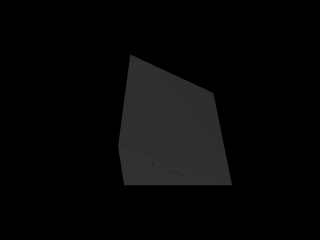

In [3]:
mujoco.mj_resetData(model, data)
mujoco.mj_forward(model, data)
renderer.update_scene(data)

media.show_image(renderer.render())